<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/11%EC%9B%94%2013%EC%9D%BC/11%EC%9B%94_13%EC%9D%BC_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 정규표현식
- 특정한 문자의 규칙을 찾고 가공하는 법

In [ ]:
# 정규표현식 라이브러리 불러오기
import re

# match 메서드 - 문자열 도입에서 패턴 찾기
# re.match(패턴, 문자열)의 형식
pattern = r'life'
script = 'life'
re.match(pattern, script)
re.match(pattern, script).group()
re.match(r'life', 'animal').group()

AttributeError: ignored

In [ ]:
def refinder(pattern, script):
    if re.match(pattern, script):
        print('Match!!')
    else:
        print('Not a match')

pattern = r'Life'
script = 'Life is so cool'
refinder(pattern, script)

pattern = r'life'
script = 'Life is so cool'
refinder(pattern, script)

Match!!
Not a match


In [ ]:
# match는 대소문자를 구분한다
pattern = r'is'
script = 'Life is so cool'
refinder(pattern, script)

Not a match


In [ ]:
# 위 코드에서 is 찾을 수 없는 이유?
# match가 문자열의 시작부터 매칭되는지 찾는 함수이기 때문
# 따라서, 텍스트 중간에 있는 패턴은 찾지 ㄴㄴ
# search 메서드 : 문자열 전체에서 패턴 찾기
#re.search(패턴, 문자열)
re.search(r'Life',script).group()

'Life'

In [ ]:
re.search(r'cool', script).group()

'cool'

In [ ]:
# re.findall(패턴, 찾으려는 문자열)
number = 'My number is 511223-1****** and yours is 521012-2******'
re.findall(r'\d{6}', number)

['511223', '521012']

In [ ]:
sentence = 'I have a lovely dog, really. I am not telling a lie. what a pretty dog! \
            I love this dog.'
#re.sub(찾을 패턴, 대체할 문자, 찾을 문자열)
re.sub(r'dog','cat', sentence)

'I have a lovely cat, really. I am not telling a lie. what a pretty cat!             I love this cat.'

In [ ]:
words = 'I am home now.   \n\n\nI am with my cat. \n\n'
print(words)

I am home now.   


I am with my cat. 




In [ ]:
re.sub(r'\n', '', words)

'I am home now.   I am with my cat. '

In [ ]:
sentence = 'I have a lovely dos, really. I am not telling a lie'
re.findall(r'\w+ly', sentence) # r'\w+ly' 문자나 숫자가 몇 번이 나와도 좋으니 반복하고 ly로 끝나는 패턴

['lovely', 'really']

In [ ]:
# 제너레이터는 itertator 객체의 한 종류이다.
# 함수를 기반으로 제너레이터를 만든 예는 다음과 같다.
# 함수 몸체에서 yield가 하나라도 보이면 단순한 함수의 정의가 아닌
# 제너레이터 함수의 정의가 된다.
# 제너레이터의 정체 : 함수의 몸체 부분을 실행하는것
def gen_num( ):
    print('first number')
    yield 1     # yield 잇으면 무조건 제너레이터
    print('second number')
    yield 2
    print('third number')
    yield 3

gen = gen_num()
next(gen) # 첫 번째 yield문을 만날때까지 실행을 이어간다.
next(gen)
next(gen)

next(gen)   # 이렇듯 함수 호출 이후에 그 실행의 흐름을 next함수가 호출될 때까지 미루는
            # 특성을 가리켜 lazy evaluation 이라 한다.

first number
second number
third number


StopIteration: ignored

# 자동차 연비 분석

In [ ]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기
import warnings

warnings.filterwarnings(action='ignore')

In [ ]:
import numpy as np
import pandas as pd

data_df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/auto-mpg.csv',header=0,engine='python')
data_df.shape

(398, 9)

In [ ]:
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
data_df = data_df.drop(['horsepower', 'origin', 'car_name'], axis=1)
data_df.shape

(398, 6)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# X, Y 분할하기
Y = data_df['mpg']  # 종속변수
X = data_df.drop(['mpg'], axis=1) # 독립변수

In [ ]:
# 훈련용 데이터와 평가용 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

# 선형회귀분석 : 모델 생성
lr = LinearRegression()

# 선형회귀분석 : 모델 학습
lr.fit(X_train, Y_train)

# 선형회귀분석 : 평가 데이터에 대한 예측 수행
Y_predict = lr.predict(X_test)

mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 12.278, RMSE : 3.504
R^2(Variance score) : 0.808


In [ ]:
print('Y 절편 값: ',  np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  -17.55
회귀 계수 값:  [-0.14  0.01 -0.01  0.2   0.76]


In [ ]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending=False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

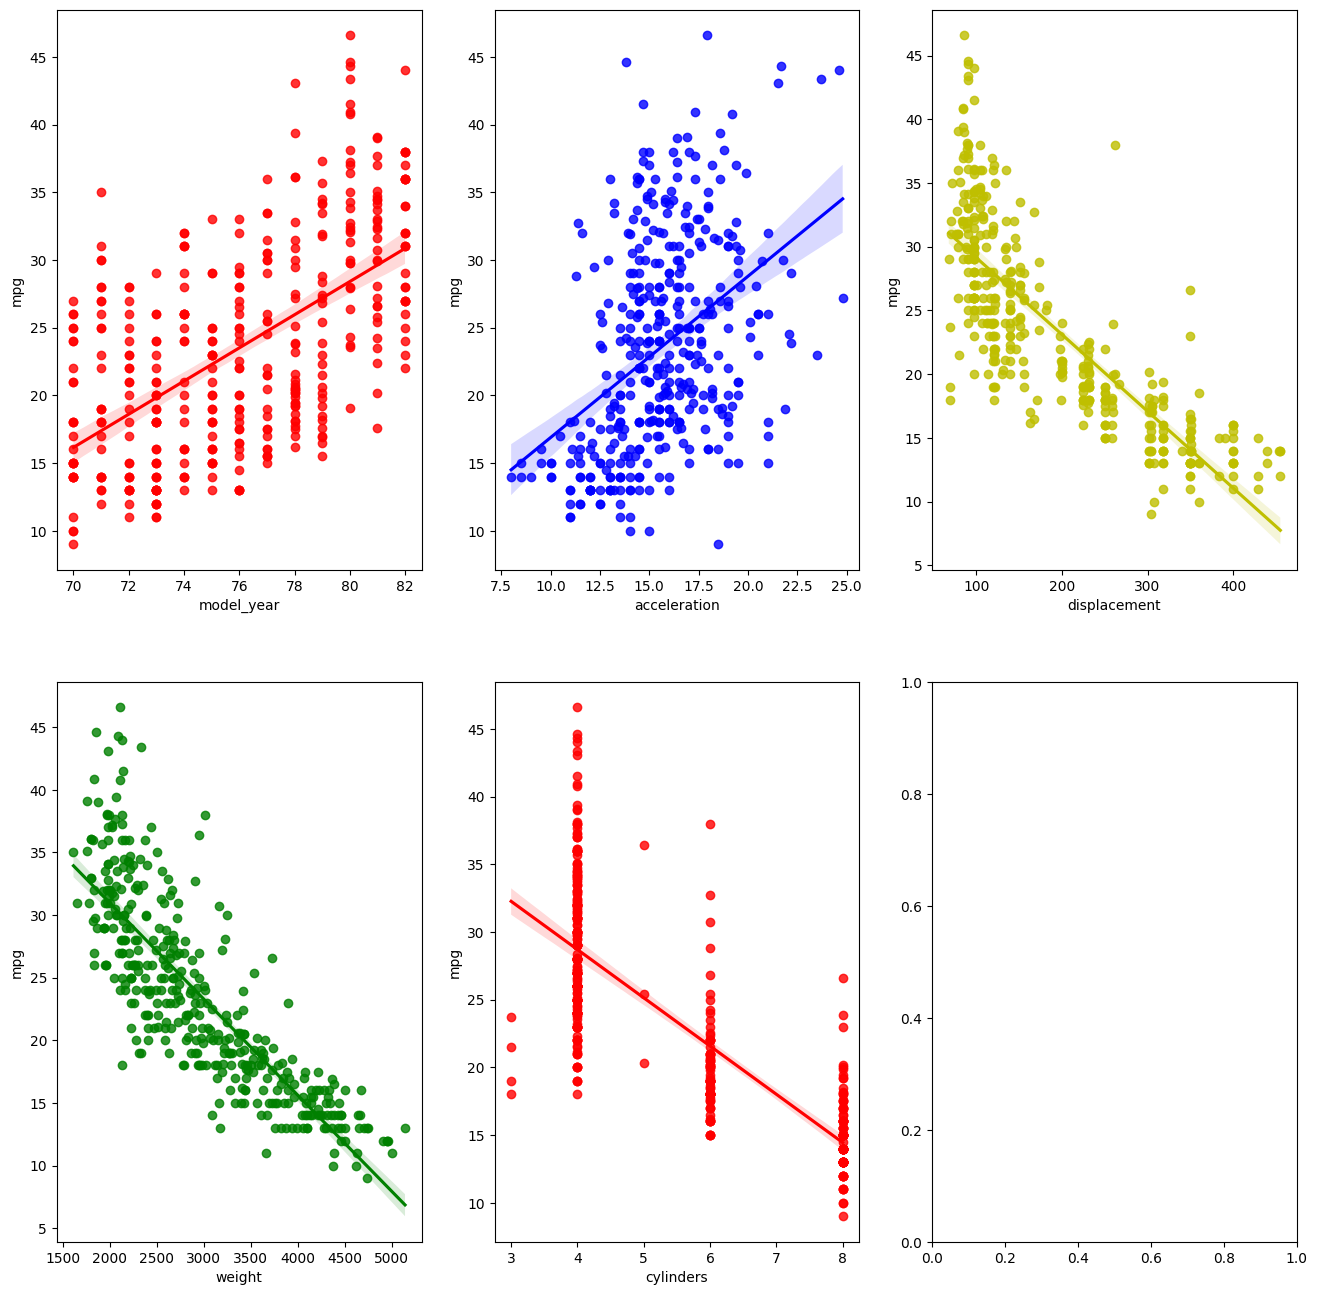

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16,16), ncols=3, nrows=2)

x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='mpg', data=data_df, ax= axs[row][col], color=plot_color[i])


In [ ]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")

cylinders_1 = int(input("cylinders : "))
displacement_1 = int(input("displacement : "))
weight_1 = int(input("weight : "))
acceleration_1 = int(input("acceleration : "))
model_year_1 = int(input("model_year : "))

In [ ]:
mpg_predict = lr.predict([[cylinders_1, displacement_1, weight_1, acceleration_1 , model_year_1]])

In [ ]:
print("이 자동차의 예상 연비(mpg)는 %.2f 입니다." %mpg_predict)